# Introduction
## Part 3: Harmonic Oscillators and the Eigenvalue Problem

In this tutorial, we will use the
[harmonic oscillator](https://en.wikipedia.org/wiki/Harmonic_oscillator)
as a toy example to get an intuitive grasp of the eigenvalue problem.
This will both set us up for the next project, in which we will treat a molecule
as a harmonic oscillator, and introduce what is arguably the most important
concept in the most important branch of mathematics for computational science.
Aside from physics and chemistry, linear algebra is an important skill in
virtually every field of computational science, including economics,
bioinformatics, computer graphics, and any field using technologies like machine
learning.
This tutorial is specifically focused on the eigenvalue problem, and assumes
some basic familiarity with matrices and vectors.
Those who are entirely new to linear algebra may wish to reference
[this appendix](./griffiths-linear-algebra-appendix.pdf)
from Griffith's *Introduction to Quantum Mechanics* as a concise guide to the
key concepts of linear algebra.

### Harmonic Oscillator

Oscillators arise whenever a system is subject to a *restoring force* that
returns it to some *equilibrium state*, which is a state of minimum potential
energy.
The name comes from the fact that, when displaced, the system will *oscillate*
back and forth around this equilibrium state.
For example, the equilibrium state of a child on a swing is at the bottom, since this minimizes their potential energy.
When displaced from equilibrium, the child *oscillates* back and forth through it.

A [*harmonic oscillator*](https://en.wikipedia.org/wiki/Harmonic_oscillator)
arises when the restoring force has a simple linear relationship to the
displacement: it points straight back towards equilibrium and grows linearly
with the size of the displacement.
More formally, we can say that a restoring force is harmonic when it is (a.)
proportional in magnitude, and (b.) opposite in direction to the displacement
throughout the system's motion.

Real physical systems always have some degree of *anharmonicity*.
The child on the swing is one clear example of an anharmonic restoring force.
Even in this case, however, the "first-order linear" approximation to the real
restoring force is a harmonic restoring force, so that the system does act as a
harmonic oscillator for sufficiently small displacements.

#### One-Dimensional Harmonic Oscillator

Let us begin by analyzing the one-dimensional harmonic oscillator.
In this case, the harmonic restoring force has the following form.
$$
  f(x)
  = - k (x - x_0)
  = - k \, \Delta x
$$
Here, $\Delta x$ is the displacement, $x_0$ is the equilibrium value, and $k$ is
the constant of proportionality.
If you have taken physics, you may be familiar with this as Hooke's law, which is used to describe springs.

![1d-spring](../../.github/1d-spring-hookes-law.svg)

To see how the "first-order linear" approximation of *any* oscillator is a
harmonic oscillator, recall that a conservative force is related to the first
derivative of the potential energy as follows.
$$
  f(x)
  =
  -
  \frac{\partial V(x)}{\partial x}
$$
This means that a linear approximation of the force corresponds to a quadratic
approximation of the potential energy.
The latter is obtained as a second order truncation of the
[Taylor series](https://en.wikipedia.org/wiki/Taylor%27s_theorem), expanded around $x_0$.
Since since the force necessarily vanishes at equilibrium, the first-order term
in the Taylor series drops out, which leaves the following.
$$
  V(x)
  \approx
  V(x_0)
  +
  \frac{1}{2}
  \frac{\partial^2 V(x_0)}{\partial x^2}
  \Delta x^2
$$
To be an equilibrium point, $x_0$ must also correspond to a local minimum of the
potential energy, so this potential has the shape of an upward parabola centered
at $x_0$.

![1d-spring-potential](../../.github/1d-spring-hookes-law-quadratic-potential.svg)

Substituting this into the force equation above gives us our linear approximation of the force.
$$
  f(x)
  =
  -
  \frac{\partial^2 V(x_0)}{\partial x^2}
  \Delta x
$$
We can see that this has the same form as the harmonic restoring force above.
Comparing the two, we find that the proportionality constant is the second derivative of the potential energy, 
$k =\frac{\partial^2 V(x_0)}{\partial x^2}$, representing its curvature at equilibrium.

#### $n$-Dimensional Harmonic Oscillator

Now, let us generalize the above analysis to the case of an $n$-dimensional harmonic oscillator. This is where linear algebra will come in.
The harmonic restoring force now has the following form.
$$
  \mathbf{f}(\mathbf{q})
  =
  -k
  (\mathbf{q} - \mathbf{q}_0)
  =
  -k
  \Delta \mathbf{q}
$$
Here, the bolded quantities represent $n$-dimensional vectors, and $\mathbf{f}(\mathbf{q})$ is the force vector as a function of position, $\mathbf{q}$.

Unlike the 1D case, there is now some question about the *direction* of the displacement in $n$-dimensional space.
It turns out that, for a given potential, only certain special directions will
satisfy the above equation.
To see this, let us proceed as we did above, deriving the linear approximation of
a generic restoring force from the quadratic approximation of its associated
potential energy.
Again, this is given by a second-order truncation of the
[Taylor series](https://en.wikipedia.org/wiki/Taylor_series#Taylor_series_in_several_variables), expanded around $\mathbf{q}_0$.
Again, the first-order term drops out because the force is necessarily zero at equilibrium, leaving the following.
$$
\begin{align*}
  V(\mathbf{q})
  &\approx
  V(\mathbf{q}_0)
  +
  \frac{1}{2}
  \sum_{i=1}^n
  \sum_{j=1}^n
  \frac{\partial^2 V(\mathbf{q}_0)}{\partial q_i \partial q_j}
  \Delta q_i \Delta q_j
  \\
  &=
  V(\mathbf{q}_0)
  +
  \frac{1}{2}
  \Delta \mathbf{q}^\dagger\,
  \mathbf{H}(\mathbf{q}_0)\,
  \Delta \mathbf{q}
\end{align*}
$$
Here, $\mathbf{H}(\mathbf{q}_0)$ is the Hessian matrix of the potential energy, evaluated at equilibrium, $\mathbf{q}_0$.
Again, the force is the negative derivative (or "gradient") of the potential, which leads to the following expression.
$$
  \mathbf{f}(\mathbf{q})
  =
  -
  \frac{\partial V(\mathbf{q})}{\partial \mathbf{q}}
  =
  -
  \mathbf{H}(\mathbf{q}_0)\,
  \Delta \mathbf{q}
$$
Comparing this with our harmonic restoring force expression above, we see that
these two expressions for the force are no longer equivalent.
In particular, whereas scalar multiplication in the equation above results in a
force that is exactly opposite in direction to the displacement, matrix
multiplication in this last equation does *not* guarantee this.
There is no contradiction here.
This last equation is a general expression which gives the linear approximation
of the force for *any* possible displacement, $\Delta \mathbf{q}$, whereas the
previous equation was the defining condition for a harmonic restring force.

As we warned above, our analysis is showing us that, in an $n$-dimensional system with $n>1$,
*not every displacement in a quadratic potential causes harmonic oscillation.*
Rather, only certain special directions of displacement do so.
We can find these special directions by setting the two force equations equal, which leads to the following condition for harmonic motion.
$$
  \mathbf{H}(\mathbf{q}_0)\,
  \Delta \mathbf{q}
  =
  k
  \Delta \mathbf{q}
$$
In words, we are looking for special vectors $\Delta \mathbf{q}$ which, when
transformed by the matrix $\mathbf{H}(\mathbf{q}_0)$, *do not change their
direction.*
In linear algebra, these special vectors are called
[*eigenvectors*](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors)
and their proportionality constants, $k$, are called
[*eigenvalues*](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors#Overview).
If linear algebra is one of the most important branches of mathematics for
practical applications, the eigenvalue problem is one of the most important
concepts within linear algebra.
It is easily the most crucial concept for understanding quantum mechanics, and it arises in many other fields as well.

#### Application: Two-Dimensional Harmonic Oscillator

As you will find for may quantum chemistry applications, our analysis brought us
face-to-face with an *eigenvalue equation*.
To get a handle on what this type of equation *means*, let us apply our analysis
to the following 2-dimentional potential energy function.
$$
  V(\mathbf{q})
  =
  \frac{(x - y) ^2}{2}
  +
  (x + y) ^2
$$
You might imagine, for example, that our system is a marble rolling around in an
oblong bowl with this particular shape.
We can create a contour plot in `matplotlib` to see what our bowl looks like.

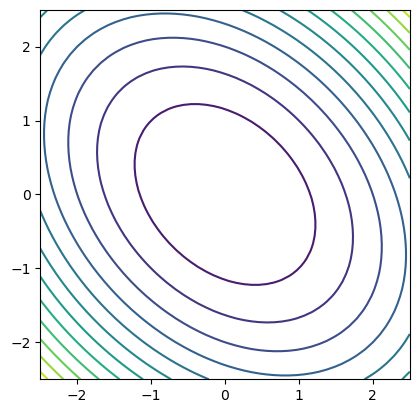

In [1]:
from matplotlib import pyplot
import numpy


# Define 2D potential function
def potential(x, y):
    return (x - y) ** 2 / 2 + (x + y) ** 2

# Generate figure object
fig, ax = pyplot.subplots()
ax.set_aspect("equal")

# Get potential values on a grid
xs = numpy.linspace(-2.5, 2.5)
ys = numpy.linspace(-2.5, 2.5)
x_, y_ = numpy.meshgrid(xs, ys)
potential(x_, y_)

# Create a contour plot of the potential
ax.contour(x_, y_, potential(x_, y_), levels=12)

The bottom of the potential well (or bowl) is at the origin, so this represents the equilibrium position of our marble.
$$
  \mathbf{q}_0
  =
  \begin{pmatrix}
    x_0 \\
    y_0
  \end{pmatrix}
  =
  \begin{pmatrix}
    0 \\
    0
  \end{pmatrix}
$$
Let us see what happens when we displace our marble by one unit along the $x$-axis.
$$
  \Delta \mathbf{q}
  =
  \begin{pmatrix}
    \Delta x \\
    \Delta y
  \end{pmatrix}
  =
  \begin{pmatrix}
    1 \\
    0
  \end{pmatrix}
$$
First, let us add this vector to our contour plot.

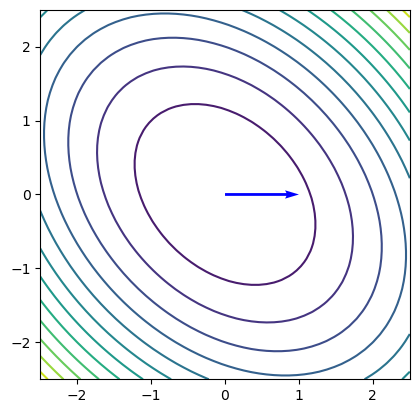

In [2]:
# Define a re-usable vector plotting function
def plot_vector(ax: pyplot.Axes, vec, orig=(0, 0), color: str = "black"):
    ax.quiver(*orig, *vec, angles="xy", scale_units="xy", scale=1, color=color)

# Define displacement vector
dq = numpy.array([1, 0])

# Plot displacement vector
plot_vector(ax, dq, color="blue")

# Show the figure
fig

Will this displacement result in harmonic oscillation?
Intuitively, if you imagine a marble released from this position in the bowl, you may guess that this is not the case.
Rather than rolling straight back towards equilibrium, the marble will start to roll south-west and probably enter into some sort of complicated elliptical trajectory.

To see this explicitly, we can use the general force expression that we derived above.
$$
  \mathbf{f}(\mathbf{q})
  =
  -\mathbf{H}(\mathbf{q}_0)\,
  \Delta \mathbf{q}
$$
To use this formula, we need to know the Hessian matrix associated with our potential.
This can be found in several ways: you could differentiate the potential formula
above by hand, you could do it using
[sympy](https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html),
or you could differentiate it numerically using your code from the previous
project.
Either way, you will find that the Hessian matrix of this potential energy function is as follows.
$$
  \mathbf{H}
  =
  \begin{pmatrix}
    \frac{\partial^2 V}{\partial x^2} & \frac{\partial^2 V}{\partial x \partial y} \\
    \frac{\partial^2 V}{\partial y \partial x} & \frac{\partial^2 V}{\partial y^2}
  \end{pmatrix}
  =
  \begin{pmatrix}
    3 & 1 \\
    1 & 3
  \end{pmatrix}
$$
Since we started from a quadratic potential function, the Hessian is constant
across the whole potential and does not depend on $\mathbf{q}$.
We are now ready to find and plot the force resulting from the above displacement.

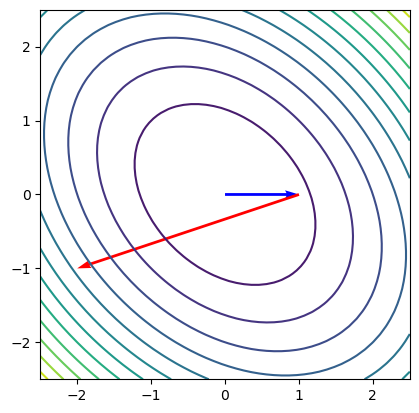

In [3]:
# Define Hessian matrix
H = numpy.array([[3, 1], [1, 3]])

# Determine force vector
force = -H @ dq  # `@` is the matrix multiplication operator

# Plot force vector
plot_vector(ax, force, orig=dq, color="red")

# Show the figure
fig

We can see that our intuition was correct.
Rather than a harmonic restoring force, pointing straight back towards
equilibrium, the force points off in a different direction.
To set our marble into harmonic motion, we must solve the eigenvalue problem for our Hessian matrix.
$$
  \mathbf{H}\,
  \Delta \mathbf{q}
  =
  k\,
  \Delta \mathbf{q}
$$
This can be done using NumPy's
[`linalg.eig` function](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html)
or, since the Hessian matrix is guaranteed to be symmetric, it can also be done using the
[`linalg.eigh` function](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html)
which is specifically for symmetric or "Hermitian" matrices.

In [4]:
soln = numpy.linalg.eigh(H)
ks = soln.eigenvalues
dqs = soln.eigenvectors

print(ks)
print(dqs)

[2. 4.]
[[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]


Note that we have two eigenvalues and two eigenvectors, which are returned as the columns of a $2\times2$ matrix.
Let us plot them to see what they look like.

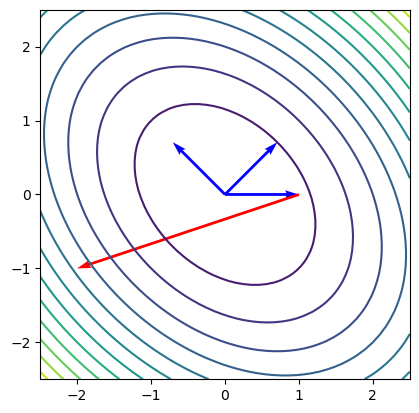

In [5]:
# Get the two eigenvectors
dq1 = dqs[:, 0]
dq2 = dqs[:, 1]

# Plot force vector
plot_vector(ax, dq1, color="blue")
plot_vector(ax, dq2, color="blue")

# Show the figure
fig

Intuitively, you may be able to see that these are exactly the two directions
which will lead to harmonic motion, causing our marble to roll back and forth
through equilibrium rather than circling it with a complex elliptical orbit.

Let us confirm this by plotting the corresponding force vectors.

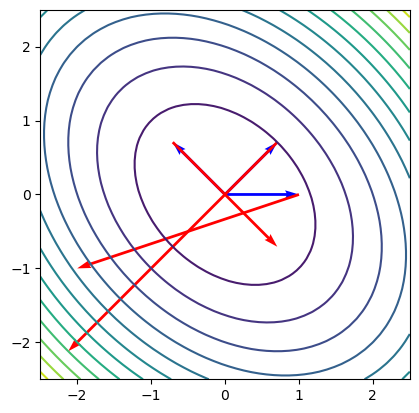

In [6]:
# Determine force vectors
force1 = -H @ dq1  # `@` is the matrix multiplication operator
force2 = -H @ dq2  # `@` is the matrix multiplication operator

# Plot force vectors
plot_vector(ax, force1, orig=dq1, color="red")
plot_vector(ax, force2, orig=dq2, color="red")

# Show the figure
fig

We see that these forces are exactly consistent with the definition of a
harmonic restoring force, pointing straight back towards equilibrium.
Their magnitudes correspond to the eigenvalues above.
Displacing along the shallow (north-west) dimension of the bowl, we get a force
with a proportionality constant of $k=2$.
Displacing along the steep (north-east) dimension of the bowl, we get a stronger
force with a proportionality constant of $k=4$.